# BMI Prediction 

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


## Read Dataset

In [41]:
df = pd.read_csv("dataset_preprocessed.csv")
df.head()

,erbmi,ertpreat,eudrink,eueat,euexercise,eufastfd,eufdsit,euprpmel,eusoda,eugenhth,codified_bmi,codified_health
0,49.400002,60,1.0,2.0,2.0,2.0,1.0,2.0,2.0,5.0,2,2
1,31.000000,65,1.0,2.0,1.0,2.0,1.0,1.0,2.0,4.0,2,2
2,30.700001,20,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,2,1
3,33.299999,30,1.0,1.0,2.0,1.0,1.0,3.0,2.0,2.0,2,1
4,28.299999,80,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2,1


## Train and Test Data 

In [42]:
shape_of_data = df.shape
X = df.iloc[:, 1:(shape_of_data[1]-3)] 
y = df['codified_bmi']
X.head()

,ertpreat,eudrink,eueat,euexercise,eufastfd,eufdsit,euprpmel,eusoda
0,60,1.0,2.0,2.0,2.0,1.0,2.0,2.0
1,65,1.0,2.0,1.0,2.0,1.0,1.0,2.0
2,20,1.0,1.0,1.0,1.0,1.0,2.0,1.0
3,30,1.0,1.0,2.0,1.0,1.0,3.0,2.0
4,80,1.0,2.0,2.0,1.0,1.0,1.0,1.0


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier

In [44]:
clf = RandomForestClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
np.unique(y_pred)

array([2])

In [45]:
clf.score(X_test,y_test)

0.62129760225669961

### Feature importance test

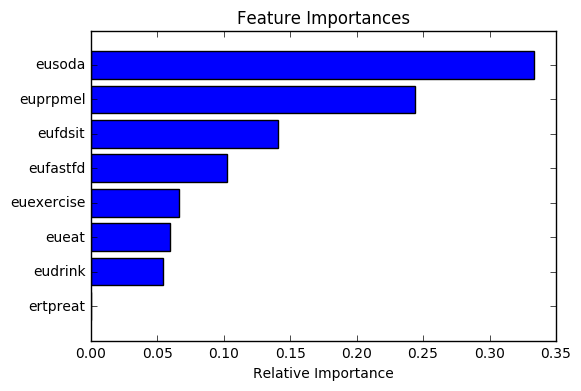

In [46]:
features = df[['ertpreat','eudrink','eueat','euexercise','eufastfd','eufdsit','euprpmel','eusoda']]
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features) ## removed [indices]
plt.xlabel('Relative Importance')
plt.show()

# Logistic Regression

In [47]:
model = LogisticRegression()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.62129760225669961

In [48]:
target_names = ['1','2','3']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00       537
          2       0.62      1.00      0.77       881

avg / total       0.39      0.62      0.48      1418



/home/kushalgbk/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
